In [1]:
import pandas as pd

In [3]:
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

In [4]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df = pd.concat([df1,df2,df3,df4,df5]) #agrupando os arquivos

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde
212,Salvador,2019-01-02,50.73,1037,3


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [6]:
df["LojaID"] = df["LojaID"].astype("object") #alterando o tipo de dado da coluna

In [7]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [8]:
df["Receita"] = df["Vendas"].mul(df["Qtde"]) #criando uma coluna

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [9]:
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [10]:
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [11]:
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [12]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [13]:
df["Ano_Venda"] = df["Data"].dt.year #criando uma coluna "ano da venda"

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
215,Natal,2019-01-02,203.84,1036,1,203.84,2019
199,Natal,2019-01-02,153.87,1036,3,461.61,2019
9,Recife,2019-01-01,11.85,980,7,82.95,2019
17,Natal,2018-02-18,276.00,854,3,828.00,2018
149,Natal,2019-01-02,22.38,1034,3,67.14,2019


In [14]:
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
107,Fortaleza,2019-01-01,21.90,1004,6,131.40,2019,1,1
193,Salvador,2019-01-02,3.97,1036,2,7.94,2019,1,2
66,Salvador,2019-01-01,70.20,1035,3,210.60,2019,1,1
53,Aracaju,2018-01-01,8.64,1522,2,17.28,2018,1,1
131,Natal,2019-01-02,63.48,1037,3,190.44,2019,1,2


In [15]:
df["Data"].min() #retorna a data mais antiga

Timestamp('2018-01-01 00:00:00')

In [16]:
df["Diferença_dias"] = df["Data"] - df["Data"].min() #retonar diferença entre dias

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_dias
217,Natal,2019-01-02,37.65,1036,2,75.30,2019,1,2,366 days
186,Natal,2019-01-02,169.09,1036,2,338.18,2019,1,2,366 days
81,Aracaju,2018-01-01,53.41,1520,2,106.82,2018,1,1,0 days
210,Natal,2019-01-02,197.64,1035,1,197.64,2019,1,2,366 days
77,Aracaju,2018-01-01,24.10,1522,1,24.10,2018,1,1,0 days


In [17]:
df["trimestre_venda"] = df["Data"].dt.quarter #criando a coluna trismestre

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_dias,trimestre_venda
184,Natal,2019-01-02,167.16,1037,1,167.16,2019,1,2,366 days,1
16,Aracaju,2018-01-01,37.68,1522,10,376.80,2018,1,1,0 days,1
175,Salvador,2019-01-02,16.53,1036,2,33.06,2019,1,2,366 days,1
177,Salvador,2019-01-02,41.19,1037,2,82.38,2019,1,2,366 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days,1


In [18]:
vendas_abril_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 4)] #criando um filtro de data específica

In [ ]:
vendas_abril_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_dias,trimestre_venda
43,Natal,2019-04-01,538.0,853,3,1614.0,2019,4,1,455 days,2
49,Natal,2019-04-01,831.0,852,2,1662.0,2019,4,1,455 days,2
65,Natal,2019-04-05,292.0,852,2,584.0,2019,4,5,459 days,2
77,Natal,2019-04-01,426.0,853,3,1278.0,2019,4,1,455 days,2
81,Natal,2019-04-02,564.0,854,2,1128.0,2019,4,2,456 days,2


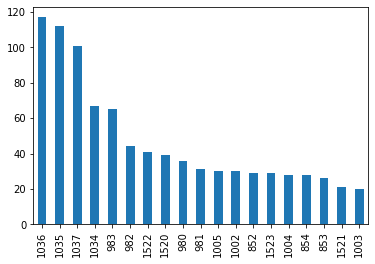

In [19]:
#visualização de dados

df["LojaID"].value_counts(ascending=False).plot.bar() #criando gráficos verticáis 

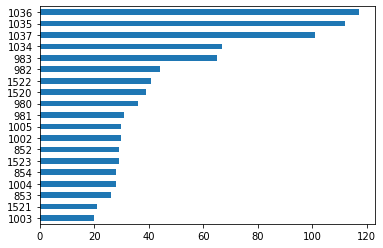

In [20]:
df["LojaID"].value_counts(ascending=True).plot.barh(); #criando gráficos hotizontáis 

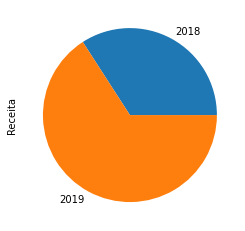

In [21]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie(); #criando gráfico em forma de pizza

In [22]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

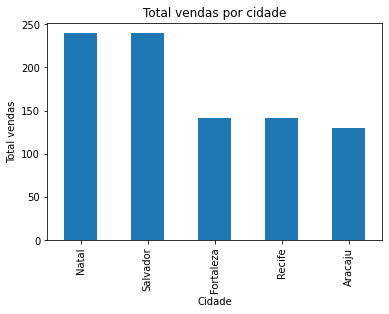

In [23]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade") #adicionando um título ao gráfico
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

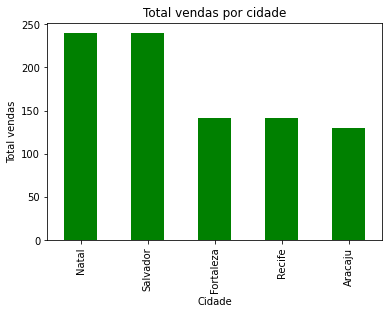

In [24]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="green")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [29]:
plt.style.use("ggplot")

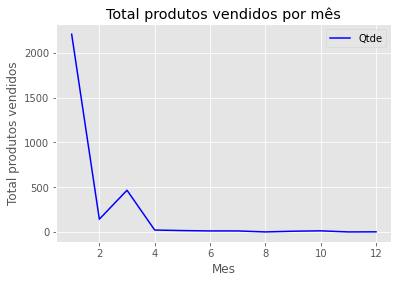

In [36]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title = "Total produtos vendidos por mês", color="blue")
plt.xlabel("Mes")
plt.ylabel("Total produtos vendidos")
plt.legend();

In [37]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [38]:
df_2019 = df[df["Ano_Venda"] == 2019]

In [39]:
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_dias,trimestre_venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


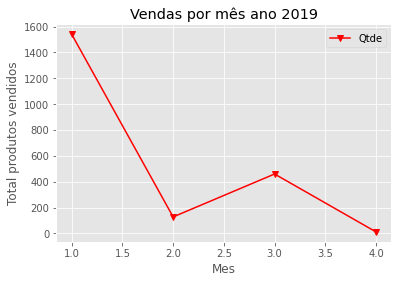

In [45]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v",title = "Vendas por mês ano 2019", color="red")
plt.xlabel("Mes")
plt.ylabel("Total produtos vendidos")
plt.legend();

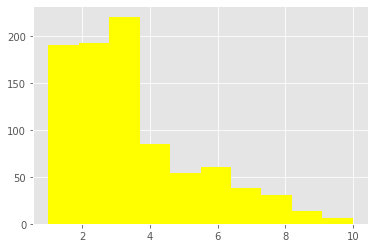

In [53]:
plt.hist(df["Qtde"],color="yellow");

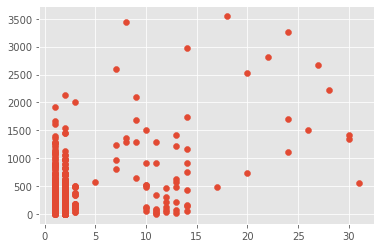

In [56]:
plt.scatter(x=df_2019["Dia_Venda"], y = df_2019["Receita"]);

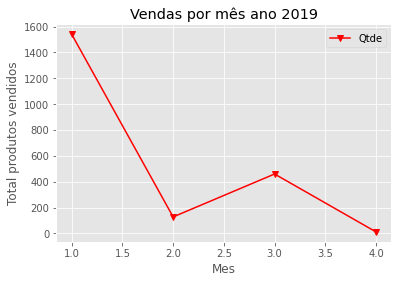

In [57]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v",title = "Vendas por mês ano 2019", color="red")
plt.xlabel("Mes")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("gráfico vendas por mes 2019.png")

# Nova seção

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")


In [60]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [61]:
df = pd.read_excel("AdventureWorks.xlsx")

In [63]:
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [64]:
df.shape

(904, 16)

In [65]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [68]:
#qual foi a receita total?
df["Valor Venda"].sum()

5984606.1426

In [69]:
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [70]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [72]:
#qual o custo total?
round(df["Custo"].sum(), 2)

2486783.05

In [76]:
#agora vamos criar uma coluna com o lucro
#receita - custo
df["Lucro"] = df["Valor Venda"] - df["Custo"]


In [78]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [79]:
#lucro total
round(df["Lucro"].sum(),2)

3497823.09

In [80]:
#criando uma coluna com o total de dias que o produto demorou para ser enviado
#data de envio - data da venda
df["Tempo envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [82]:
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
34,2008-06-07,2008-06-14,306,1178,19053,200806074CS586,330.66,998.0,6,0.0,5988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,1983.96,4004.04,7
179,2008-10-03,2008-10-13,307,1178,19106,200810034CS637,330.66,998.0,12,0.0,11976.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,3967.92,8008.08,10
489,2009-01-03,2009-01-07,306,366,19060,200901033CS676,348.58,758.0,20,3032.0,12128.0,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,6971.60,5156.40,4


In [85]:
#media do tempo de envio por marca
df.groupby("Marca")["Tempo envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo envio, dtype: float64

In [86]:
#procurando valores ausentes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo envio       0
dtype: int64

In [89]:
#e se quiser saber o lucro por ano e por marca?
#vamos agrupar por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [88]:
pd.options.display.float_format = '{:20,.2f}'.format

In [94]:
#resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()

In [95]:
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [96]:
#qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

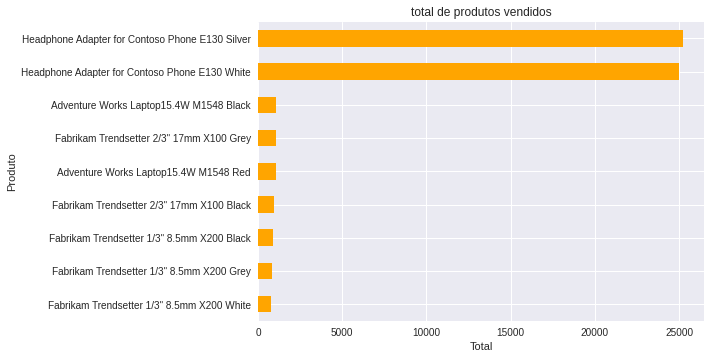

In [99]:
#gráfico total produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="total de produtos vendidos", color ="orange")
plt.xlabel("Total")
plt.ylabel("Produto");

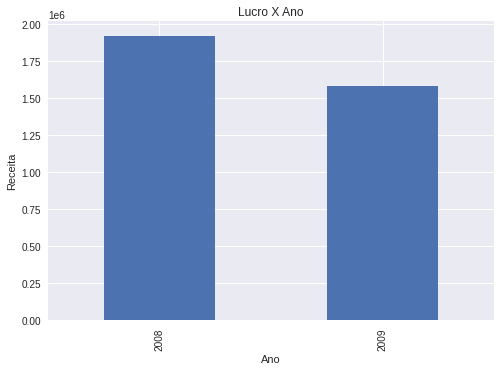

In [100]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro X Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [101]:
#visualizar apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [102]:
df_2009.head(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12


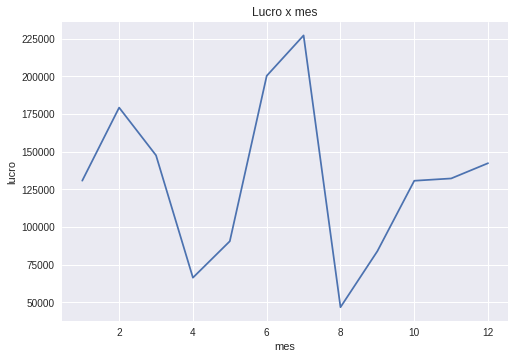

In [103]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x mes")
plt.xlabel("mes")
plt.ylabel("lucro");

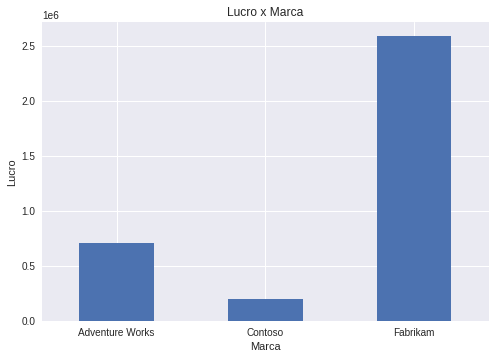

In [104]:
df.groupby("Marca")["Lucro"].sum().plot.bar(title = "Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [105]:
df["Tempo envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo envio, dtype: float64

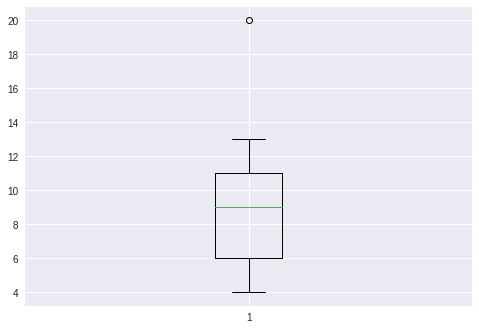

In [106]:
plt.boxplot(df["Tempo envio"]);

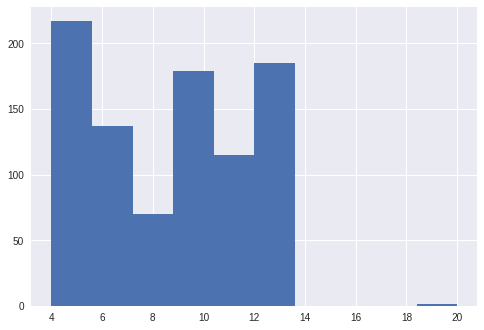

In [107]:
plt.hist(df["Tempo envio"]);

In [108]:
#identificando o outlier
df[df["Tempo envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [109]:
df.to_csv("df_vendas_novo.csv", index=False)